# Kaung Khant Lin
# 6540131
# 541

In [44]:
# Topic Modeling: LDA vs LSA Analysis

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

## Data

We will be using articles from NPR (National Public Radio), obtained from their website [www.npr.org](http://www.npr.org)

In [46]:
# npr = pd.read_csv('npr.csv')
file = pd.read_excel('Topic Modeling.xlsx')

## Preprocessing

In [47]:
cv = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')

In [48]:
dtm = cv.fit_transform(file['Sentence'])

In [49]:
# Check dataset size and vocabulary
print(f"Number of sentences: {len(file)}")
print(f"Vocabulary size (after filtering): {len(cv.get_feature_names_out())}")
print(f"All words in vocabulary: {cv.get_feature_names_out()}")

Number of sentences: 30
Vocabulary size (after filtering): 131
All words in vocabulary: ['acting' 'affordable' 'amazing' 'app' 'artificial' 'assignment' 'battery'
 'beach' 'beautiful' 'bitter' 'broth' 'bugs' 'campus' 'championship'
 'changing' 'character' 'cheese' 'cinematography' 'classes' 'clean'
 'coach' 'coffee' 'comfortable' 'confusing' 'convenient' 'cooling'
 'coordination' 'crowded' 'day' 'deadline' 'delayed' 'delicious' 'despite'
 'dessert' 'development' 'did' 'director' 'disappointing' 'easy' 'effects'
 'ending' 'endurance' 'enjoyed' 'exam' 'excited' 'fans' 'fast' 'final'
 'fixed' 'flight' 'food' 'football' 'fresh' 'friendly' 'goal' 'great'
 'group' 'hard' 'heavy' 'helpful' 'historical' 'hotel' 'impressive'
 'improve' 'industries' 'intelligence' 'interface' 'job' 'laptop' 'lasts'
 'library' 'local' 'lot' 'loved' 'match' 'melted' 'menu' 'minutes' 'movie'
 'new' 'night' 'noodles' 'online' 'packed' 'pastries' 'people' 'perfectly'
 'performance' 'performances' 'pizza' 'players' 'p

## LSA

In [50]:
LSA = TruncatedSVD(n_components=4, random_state=42)

In [51]:
LSA.fit(dtm)

,n_components,4
,algorithm,'randomized'
,n_iter,5
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42
,tol,0.0


## Top Words Per Topic (LSA)

In [52]:
for index, topic in enumerate(LSA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['effects', 'stunning', 'movie', 'clean', 'slow', 'tasted', 'service', 'restaurant', 'food', 'great']


THE TOP 10 WORDS FOR TOPIC #1
['strength', 'trained', 'endurance', 'clean', 'lasts', 'battery', 'smartphone', 'heavy', 'use', 'day']


THE TOP 10 WORDS FOR TOPIC #2
['soundtrack', 'slow', 'service', 'tasted', 'restaurant', 'local', 'friendly', 'people', 'enjoyed', 'food']


THE TOP 10 WORDS FOR TOPIC #3
['people', 'local', 'food', 'enjoyed', 'tough', 'team', 'football', 'won', 'season', 'championship']




## Visualizing Top Words Per Topic (LSA)

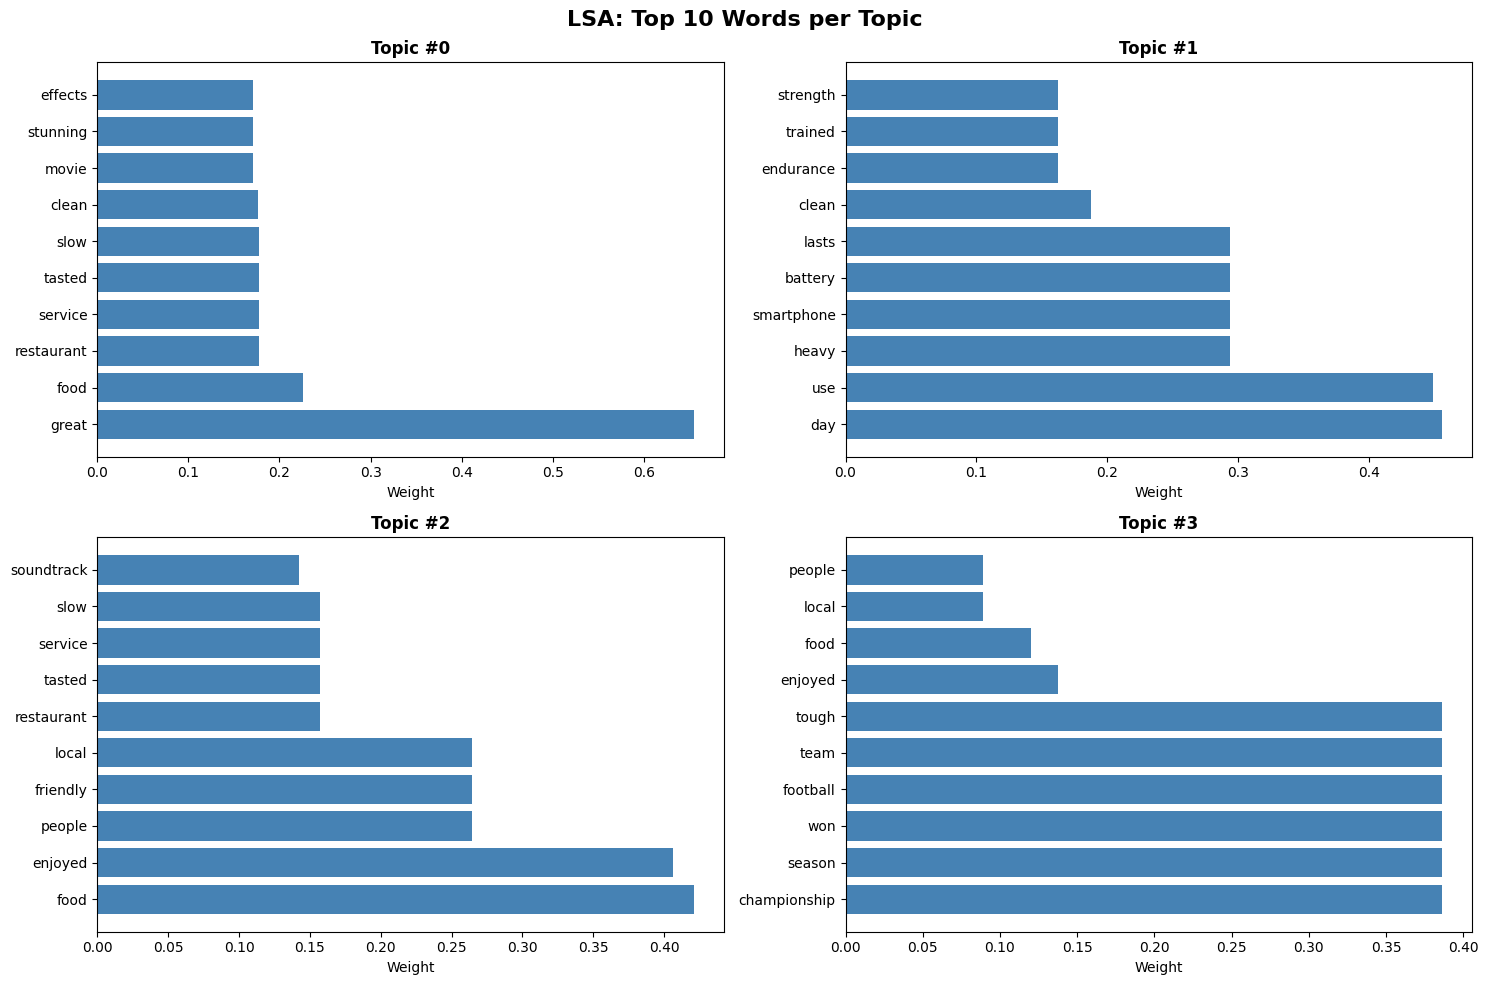

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('LSA: Top 10 Words per Topic', fontsize=16, fontweight='bold')

for index, topic in enumerate(LSA.components_):
    # Get top 10 word indices
    top_indices = topic.argsort()[-10:]
    top_words = [cv.get_feature_names_out()[i] for i in top_indices]
    top_values = topic[top_indices]
    
    # Determine subplot position
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    
    # Create bar chart
    ax.barh(range(len(top_words)), top_values, color='steelblue')
    ax.set_yticks(range(len(top_words)))
    ax.set_yticklabels(top_words)
    ax.set_xlabel('Weight', fontsize=10)
    ax.set_title(f'Topic #{index}', fontsize=12, fontweight='bold')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

## LDA (Latent Dirichlet Allocation)

## Visualizing Top Words Per Topic (LDA)

In [54]:
LDA = LatentDirichletAllocation(n_components=4, random_state=42)

## Top Words Per Topic (LDA)

In [55]:
LDA.fit(dtm)

,n_components,4
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [56]:
for index, topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['hard', 'players', 'coach', 'work', 'tough', 'team', 'football', 'championship', 'won', 'season']


THE TOP 10 WORDS FOR TOPIC #1
['development', 'director', 'did', 'restaurant', 'service', 'slow', 'tasted', 'enjoyed', 'food', 'great']


THE TOP 10 WORDS FOR TOPIC #2
['goal', 'scored', 'minutes', 'visual', 'movie', 'cinematography', 'effects', 'stunning', 'clean', 'final']


THE TOP 10 WORDS FOR TOPIC #3
['noodles', 'loved', 'rich', 'heavy', 'battery', 'lasts', 'smartphone', 'clean', 'use', 'day']




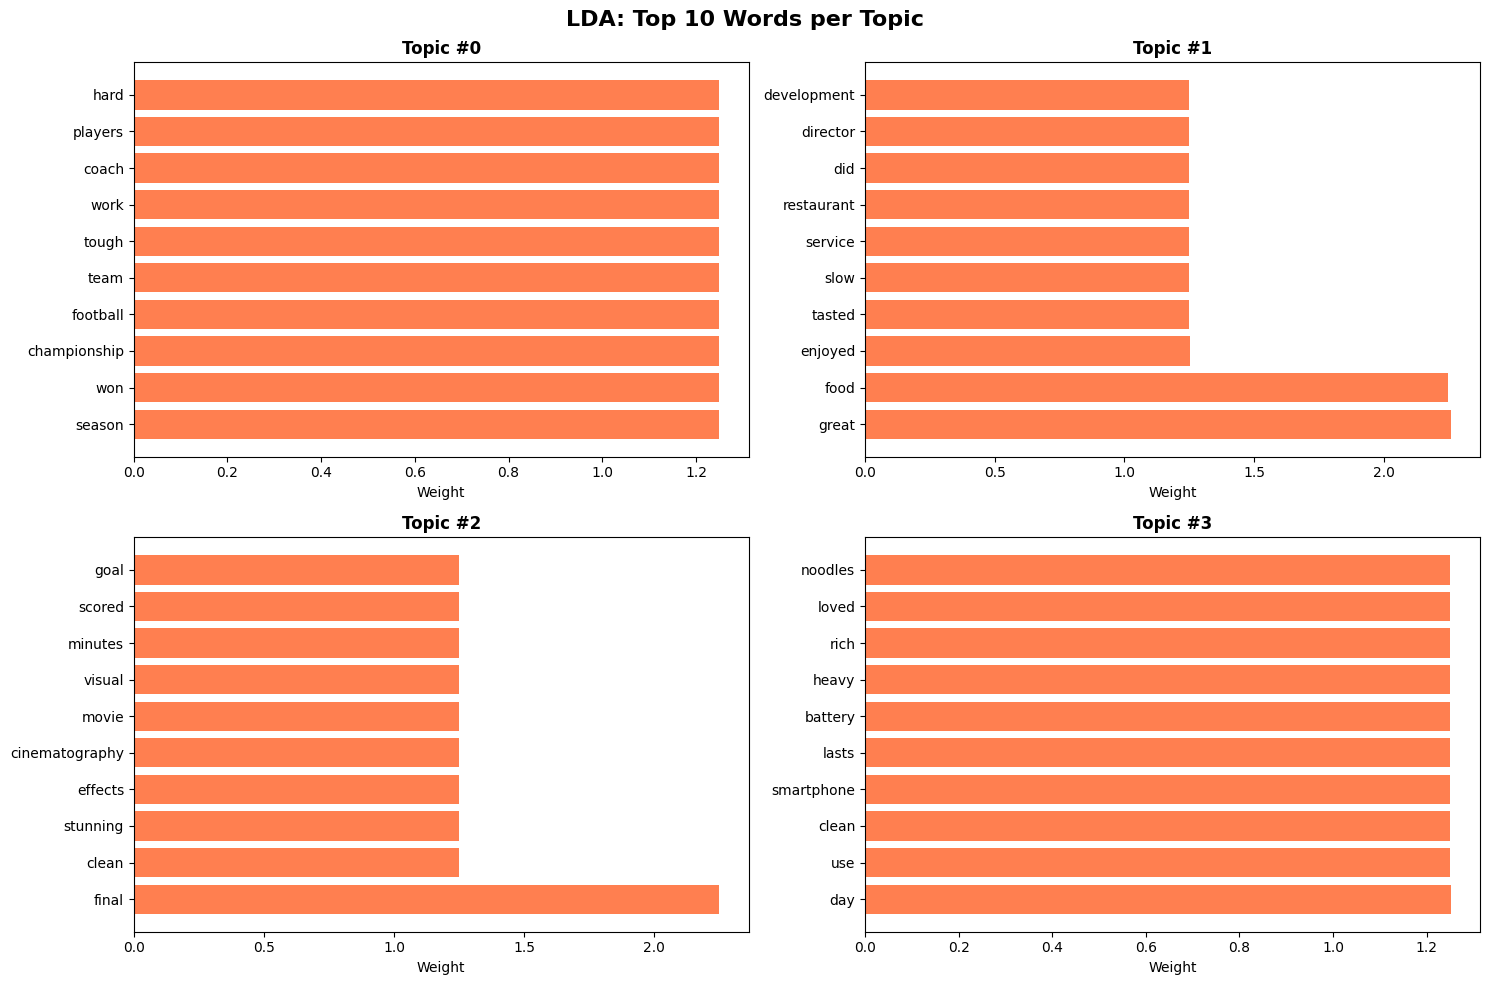

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('LDA: Top 10 Words per Topic', fontsize=16, fontweight='bold')

for index, topic in enumerate(LDA.components_):
    # Get top 10 word indices
    top_indices = topic.argsort()[-10:]
    top_words = [cv.get_feature_names_out()[i] for i in top_indices]
    top_values = topic[top_indices]
    
    # Determine subplot position
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    
    # Create bar chart
    ax.barh(range(len(top_words)), top_values, color='coral')
    ax.set_yticks(range(len(top_words)))
    ax.set_yticklabels(top_words)
    ax.set_xlabel('Weight', fontsize=10)
    ax.set_title(f'Topic #{index}', fontsize=12, fontweight='bold')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

## Manual Topic Analysis

Looking at all 30 sentences, I can identify **5 distinct topics**:

1. **Technology/Gadgets** (5 sentences): AI, app interface, software, smartphone, laptop
2. **Food/Dining** (6 sentences): local food, noodles, coffee, dessert, pizza, restaurant
3. **Movies/Entertainment** (5 sentences): soundtrack, director, movie, plot, acting
4. **Sports** (4 sentences): goal, coach, football, stadium, training
5. **Education** (5 sentences): study, online classes, assignment, library, group project

The remaining 5 sentences are about travel/accommodation, which could be a 6th topic but with limited representation.

**Why 5 topics?** 
- Clear thematic separation in the data
- Each topic has sufficient representation (4-6 sentences)
- More granular than 4, capturing education as a separate theme
- Balances interpretability with topic coherence

## Re-running Models with 5 Topics

In [20]:
# LSA with 5 topics
LSA_5 = TruncatedSVD(n_components=5, random_state=42)
LSA_5.fit(dtm)

,n_components,5
,algorithm,'randomized'
,n_iter,5
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42
,tol,0.0


In [21]:
print("=== LSA with 5 Topics ===\n")
for index, topic in enumerate(LSA_5.components_):
    print(f'TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

=== LSA with 5 Topics ===

TOPIC #0
['visual', 'stunning', 'movie', 'clean', 'slow', 'tasted', 'service', 'restaurant', 'food', 'great']

TOPIC #1
['interface', 'easy', 'app', 'clean', 'battery', 'lasts', 'smartphone', 'heavy', 'day', 'use']

TOPIC #2
['friendly', 'people', 'football', 'team', 'season', 'tough', 'won', 'championship', 'enjoyed', 'food']

TOPIC #3
['predictable', 'service', 'tasted', 'restaurant', 'slow', 'local', 'people', 'friendly', 'enjoyed', 'food']

TOPIC #4
['menu', 'amazing', 'studied', 'exam', 'night', 'match', 'minutes', 'scored', 'goal', 'final']



In [22]:
# LDA with 5 topics
LDA_5 = LatentDirichletAllocation(n_components=5, random_state=42)
LDA_5.fit(dtm)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [23]:
print("=== LDA with 5 Topics ===\n")
for index, topic in enumerate(LDA_5.components_):
    print(f'TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

=== LDA with 5 Topics ===

TOPIC #0
['performance', 'cooling', 'laptop', 'season', 'team', 'championship', 'tough', 'football', 'won', 'enjoyed']

TOPIC #1
['did', 'job', 'character', 'director', 'restaurant', 'tasted', 'service', 'slow', 'food', 'great']

TOPIC #2
['match', 'minutes', 'scored', 'goal', 'cinematography', 'stunning', 'visual', 'movie', 'effects', 'final']

TOPIC #3
['historical', 'sites', 'trip', 'visited', 'lasts', 'smartphone', 'battery', 'heavy', 'day', 'use']

TOPIC #4
['rich', 'loved', 'noodles', 'spicy', 'software', 'bugs', 'update', 'fixed', 'new', 'clean']

